# Load the data


In [ ]:
import zipfile
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
zp= zipfile.ZipFile('pizza_steak.zip')
zp.extractall()
zp.close()

* So, the first step is to load the data. if the data is in zip format importing zipfile module would be better.
* !wget is used to download data from URL or internet. in google colab we dont need to import wget module but in other IDE we have to import wget first. In other IDE we havr to use wget.download('URL').

# Understanding the data.

* OS is a module in pythons which is called Operating system module.
this module helps to create a directory, getting the information from the existing directory, paths, and the all the operating system related depndencies.

In [ ]:
import os
for dirpath, dirname, filename in os.walk('pizza_steak'):
  print(f'There are {len(dirname)} directories and {len(filename)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
classes = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(classes)

['pizza' 'steak']


* Defining the function to view the  random images.

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
from google.colab.patches import cv2_imshow
def random_img(target_dir,target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  image= cv.imread(target_folder + '/' + random_image[0])
  image=cv.resize(image,(224,224))
  cv2_imshow(image)
  cv.waitKey(0)
  # image = mpimg.imread(target_folder + '/' + random_image[0])
  # plt.imshow(image)

  # plt.axis('off')
  # plt.title(target_class)

random_img(target_dir= 'pizza_steak/train/',
           target_class= 'steak') 


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# normalizing images b/w 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# making working directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# importing data from directories and turning it into batchsize
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               batch_size=32,
                                               class_mode= 'binary',
                                               target_size=(224,224),
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               class_mode= 'binary',
                                               target_size=(224,224),
                                               seed= 42)


# creating a model

tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation='relu',
                                 input_shape= (224,224,3)),
          tf.keras.layers.Conv2D(10,3,activation='relu'),
          tf.keras.layers.MaxPool2D(2),
          tf.keras.layers.Conv2D(10,3,activation='relu'),
          tf.keras.layers.Conv2D(10,3,activation='relu'),
          tf.keras.layers.MaxPool2D(2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1,activation='sigmoid')                            
])

model_1.compile(optimizer= 'Adam',
                loss = tf.keras.losses.binary_crossentropy,
                metrics= ['accuracy'])

history_1= model_1.fit(train_data, epochs=5,
                       steps_per_epoch= len(train_data),
                       validation_data= valid_data,
                       validation_steps= len(valid_data))

In [ ]:
model_1.summary()

# Classfying with ANN to see how it works.

In [ ]:
tf.random.set_seed(42)

ANN_model= tf.keras.models.Sequential([
           tf.keras.layers.Flatten(input_shape=(224,224,3)),
           tf.keras.layers.Dense(100,activation='relu'),
           tf.keras.layers.Dense(100,activation='relu'),
           tf.keras.layers.Dense(100,activation='relu'),
           tf.keras.layers.Dense(1,activation='sigmoid')
])

ANN_model.compile(optimizer='Adam',
                  loss= tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])

ANN_model.fit(train_data,
              epochs=10,
              steps_per_epoch=len(train_data),
              validation_data=valid_data,
              validation_steps=len(valid_data))

In [ ]:
ANN_model.summary()

*  Here, total number of parameters are too many than CNN and still its not working satisfactoriely. it better to use CNN. 

# Breaking the model to Understand how it works.

**steps for the model** 

---


1.   Visualize the data.
2.   preprocess the data.
3.   creat a model.
4.   fit the model
5.   Evaluate the model.
6.   Adjust different parameters to improve models
7.   repeat all the steps untill satisfied.



### visualizing the data

In [ ]:
# plt.figure()
# plt.subplot(1,2,1)
steak_images= random_img('pizza_steak/train/', 'steak')
# plt.subplot(1,2,2)
pizza_images= random_img('pizza_steak/train/','pizza')

### Preprocessing the data.

In [ ]:
# creating a train and test directory

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'


1. First convert data into minibatches or in batches and we have to normalize data before dividing it into batches.
* batches is a small subsets of data. rather than looking large number of data at a time it is prefferable to divide data into batches.

* Making batches can be advantageous bcz all thre high number of images may not be load in memory of processor.
* it will be very difficult for the model to learn from the large number of images in  single time.

batch size 32 is very ideal size.

In [ ]:
#  Tensorflow provids easy class to normalize data and test and train data genrator which is 'ImageDataGenerator' 
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen= ImageDataGenerator(rescale= 1/255.)

# creating the train data and test data.

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode= 'binary',
                                               seed = 42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size= 32,
                                             target_size = (224,224),
                                             class_mode= 'binary',
                                             seed= 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data) #here, images or data as divided into batches. as there were 1500 images there are 47 batches of 32 images.

47

In [ ]:
# 47*32 as above

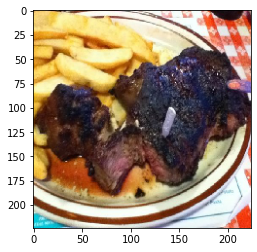

In [ ]:
images, labels = train_data.next() # here this 'next' means next batch of data.
plt.imshow(images[1])

In [ ]:
len(labels),labels

(32, array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
       dtype=float32))

### Create a model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Sequential

In [ ]:
model_2 = Sequential([
          Conv2D(10, 3, activation= 'relu', input_shape= (224,224,3)),
          Conv2D(10, 3, activation= 'relu'),
          Conv2D(10, 3, activation= 'relu'),
          Flatten(),
          Dense(1,activation='sigmoid')
])

In [ ]:
model_2.compile(optimizer=Adam(),
                loss= 'binary_crossentropy',
                metrics= ['accuracy'])

### Fit the model.

In [ ]:
history_2= model_2.fit(train_data,
                       epochs= 5,
                       steps_per_epoch= len(train_data),
                       validation_data= test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 1.2593 - accuracy: 0.6373 - val_loss: 0.4816 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4805 - accuracy: 0.7913 - val_loss: 0.4212 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3825 - accuracy: 0.8400 - val_loss: 0.4157 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.2115 - accuracy: 0.9247 - val_loss: 0.3888 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 13s 275ms/step - loss: 0.0897 - accuracy: 0.9753 - val_loss: 0.4750 - val_accuracy: 0.8080


### Evaluate the model

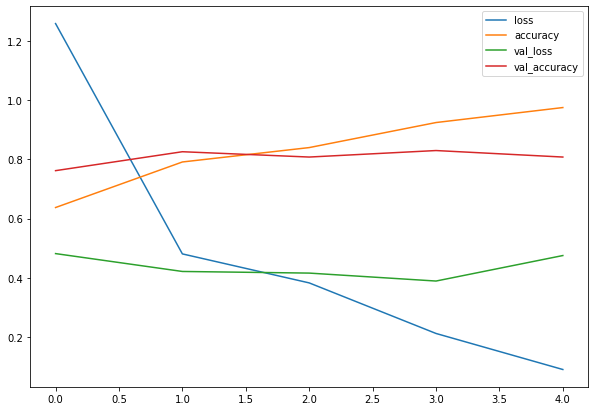

In [ ]:
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize= (10,7))

In [ ]:
# Defining a function to evaluate the model.
def plot_curves(history):
  # returns curves of loss and accuracy
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy= history.history['val_accuracy']

  epochs= range(len(history.history['loss']))


  plt.plot(epochs, loss, label= 'training_loss')
  plt.plot(epochs, val_loss, label= 'validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('epochs vs loss')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label= 'accuracy')
  plt.plot(epochs, val_accuracy, label= 'val_accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.title('epochs vs accuracy')
  plt.legend()

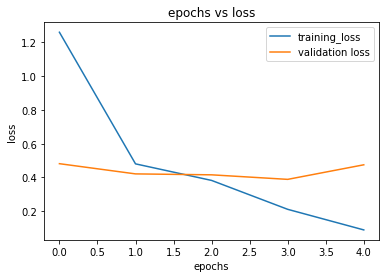

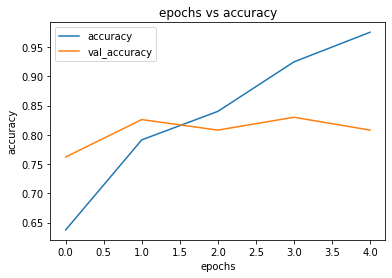

In [ ]:
plot_curves(history_2)

>  Here, validation loss is stating to increase that means the model is overfitting the traing dataset.
* When model's validation loss starts to increase it means the model is overfitting the training data.
* it means, its learning the patters in training data too well that model ability is diminished to generalise unseen data.

* For this overfitting problem, models hyperparameters or parameters should be adjusted.

### Adjust model parameters.
> TO induce the overfitting:
1. increase the numbers of convolution layers.
2. increase the numbers of conv filters.
3. add another Dense layer to the output of flatten layer.

> To reduce the overfitting:
1. Add data augmentation.
2. Add regularization layers(Maxpool2D).
3. Add more data.

In [ ]:
#  Creating a model

model_3= Sequential([
         Conv2D(10, 3, activation= 'relu', input_shape=(224,224,3)),
        
         MaxPool2D(),# regularization layer
         Conv2D(10, 3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(10, 3, activation= 'relu'),
         MaxPool2D(),
         Flatten(),
         Dense(1, activation= 'sigmoid')
])

In [ ]:
#  Compiling the model
model_3.compile(optimizer=Adam(),
                loss= 'binary_crossentropy',
                metrics= ['accuracy'])

In [ ]:
# Fit the model

history_3= model_3.fit(train_data,
            epochs= 5,
            steps_per_epoch= len(train_data),
            validation_data= test_data,
            validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.5789 - accuracy: 0.7080 - val_loss: 0.4556 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4590 - accuracy: 0.7960 - val_loss: 0.3947 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4272 - accuracy: 0.8173 - val_loss: 0.3562 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4012 - accuracy: 0.8247 - val_loss: 0.3316 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3890 - accuracy: 0.8307 - val_loss: 0.3767 - val_accuracy: 0.8320


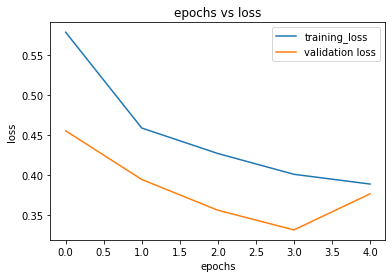

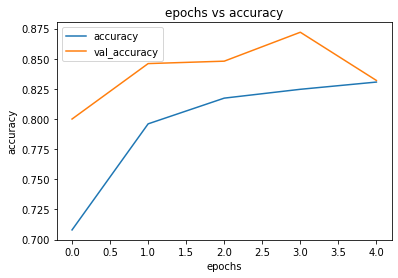

In [ ]:
plot_curves(history_3)

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

> Data augmentation
* its an another method to reduce overfitting.
* Data augmentation is nothing but the alteration in the data. by doing that model is allowed to learn more genralizing patterns. here, altering means adjusting the rotations, fliping, shifting, or ccropping the image or data.





In [ ]:
#  Data augmentation can be simply done by ImageDataGenerator.

train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range= 0.2,
                                             shear_range=0.2,
                                             zoom_range= 0.2,
                                             width_shift_range= 0.2,
                                             height_shift_range= 0.3,
                                             horizontal_flip= True)

train_datagen = ImageDataGenerator(rescale= 1/255.)
# augmentation should only be done in training data bcz if test data also be augmented then model may not be able to learn.

In [ ]:
train_data_aug = train_datagen_augmented.flow_from_directory(train_dir,
                                                             batch_size= 32,
                                                             target_size=(224,224),
                                                             class_mode= 'binary',
                                                             shuffle= False)

train_data = train_datagen.flow_from_directory(train_dir,
                                                             batch_size= 32,
                                                             target_size=(224,224),
                                                             class_mode= 'binary',
                                                             shuffle= False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


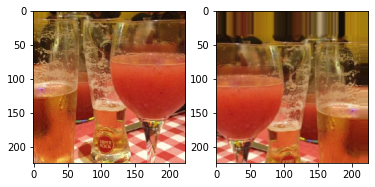

In [ ]:
images, labels = train_data.next()
aug_images,aug_labels = train_data_aug.next()
plt.figure()
plt.subplot(1,2,1)
plt.imshow(images[21])
plt.subplot(1,2,2)
plt.imshow(aug_images[21])

21
original image
augmented image


(-0.5, 223.5, 223.5, -0.5)

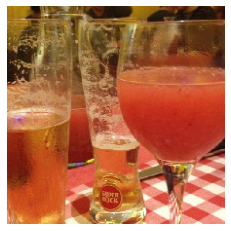

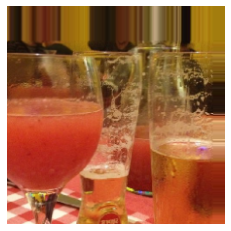

In [ ]:
import random
random_num = random.randint(0, 32)
print(random_num)

plt.imshow(images[random_num])
print('original image')
plt.axis('off')
plt.figure()
plt.imshow(aug_images[random_num])
print('augmented image')
plt.axis('off')

* After adjusting some parameters, Data augmentation in this case, repeat all the steps again.

### Repeat untill satisfied.

In [ ]:
# Create another model:




model_4= Sequential([
         Conv2D(10, 3, activation= 'relu', input_shape= (224,224,3)),
         MaxPool2D(),
         Conv2D(10, 3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(10, 3, activation= 'relu'),
         MaxPool2D(),
         Flatten(),
         Dense(1, activation= 'sigmoid')
])

# Compile the model
model_4.compile(optimizer= Adam(),
                loss= 'binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Fit the model

history_4 =model_4.fit(train_data_aug,
                   epochs= 5,
                   steps_per_epoch= len(train_data_aug),
                   validation_data= test_data,
                   validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 581ms/step - loss: 0.7425 - accuracy: 0.5813 - val_loss: 0.7109 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 27s 573ms/step - loss: 0.7053 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 29s 611ms/step - loss: 0.6893 - accuracy: 0.5100 - val_loss: 0.6696 - val_accuracy: 0.5440
Epoch 4/5
47/47 [==============================] - 44s 947ms/step - loss: 0.6932 - accuracy: 0.6020 - val_loss: 0.6598 - val_accuracy: 0.7360
Epoch 5/5
47/47 [==============================] - 27s 561ms/step - loss: 0.6792 - accuracy: 0.6233 - val_loss: 0.6448 - val_accuracy: 0.7900


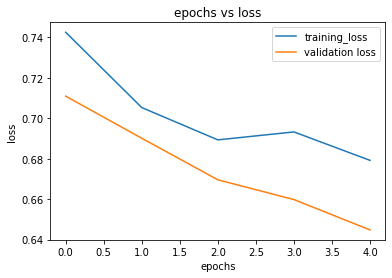

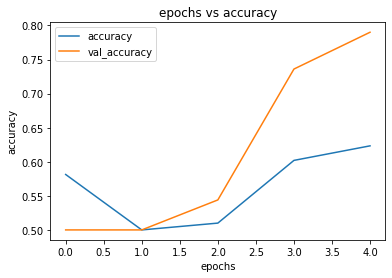

In [ ]:
plot_curves(history_4)

* model has performed very poorly. trying to shuffle the augmented data

In [ ]:
train_data_aug_shuf = train_datagen_augmented.flow_from_directory(train_dir,
                                                         batch_size=32,
                                                         class_mode= 'binary',
                                                         target_size= (224,224),
                                                         shuffle= True)


Found 1500 images belonging to 2 classes.


In [ ]:
# create a model:
model_5 = Sequential([
          Conv2D(10, 3, activation= 'relu', input_shape=(224,224,3)),
          MaxPool2D(),
          Conv2D(10, 3, activation= 'relu'),
          Conv2D(10, 3, activation= 'relu'),
          MaxPool2D(),
          Conv2D(10, 3, activation= 'relu'),
          MaxPool2D(),
          Flatten(),
          Dense(1, activation= 'sigmoid')
])
# compile model

model_5.compile(optimizer= Adam(),
                loss= 'binary_crossentropy',
                metrics= ['accuracy'])

#fit the model

history_5= model_5.fit(train_data_aug_shuf,
                       epochs= 5,
                       steps_per_epoch= len(train_data_aug_shuf),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6685 - accuracy: 0.5653 - val_loss: 0.6272 - val_accuracy: 0.6100
Epoch 2/5
47/47 [==============================] - 41s 870ms/step - loss: 0.6181 - accuracy: 0.6507 - val_loss: 0.5630 - val_accuracy: 0.7080
Epoch 3/5
47/47 [==============================] - 40s 860ms/step - loss: 0.5857 - accuracy: 0.6853 - val_loss: 0.4910 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 37s 788ms/step - loss: 0.5513 - accuracy: 0.7247 - val_loss: 0.4276 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 37s 773ms/step - loss: 0.5195 - accuracy: 0.7293 - val_loss: 0.4262 - val_accuracy: 0.7980


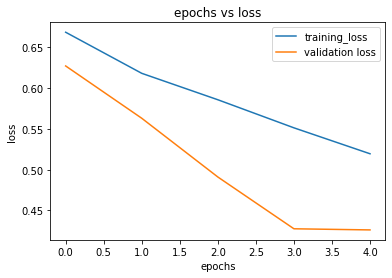

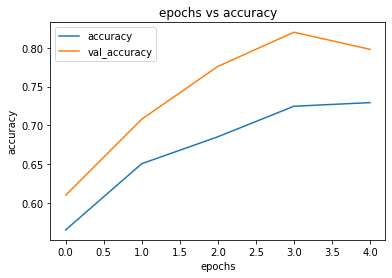

In [ ]:
plot_curves(history_5)

* model still requires improvement even though augmentation and adding regularization has been done.
> model can be improved by:
    1. Adding more number of convolutional and maxpool layers.
    2. adding filters.
    3. traing model for longer.
    4. finding ideal learning rate.
    5. More data.
    6. Use transfer learning.

    



In [ ]:

model_6= Sequential([
         Conv2D(64, 3, activation= 'relu', input_shape=(224,224,3)),
         Conv2D(64, 3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(32, 3, activation= 'relu'),
         Conv2D(32, 3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(32, 3, activation= 'relu'),
         Conv2D(32,3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(10, 3, activation= 'relu'),
         Conv2D(10,3, activation= 'relu'),
         MaxPool2D(),
         Flatten(),
         Dense(1, activation= 'sigmoid')
])

model_6.compile(optimizer= Adam(0.001),
                loss= 'binary_crossentropy',
                metrics= ['accuracy'])

hisotry_6= model_6.fit(train_data_aug_shuf,
                       epochs=10,
                       steps_per_epoch= len(train_data_aug_shuf),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/10
47/47 [==============================] - 34s 629ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6865 - val_accuracy: 0.5080
Epoch 2/10
47/47 [==============================] - 25s 536ms/step - loss: 0.6777 - accuracy: 0.5773 - val_loss: 0.5896 - val_accuracy: 0.7620
Epoch 3/10
47/47 [==============================] - 27s 569ms/step - loss: 0.6799 - accuracy: 0.5627 - val_loss: 0.6111 - val_accuracy: 0.6280
Epoch 4/10
47/47 [==============================] - 26s 544ms/step - loss: 0.5994 - accuracy: 0.6867 - val_loss: 0.3972 - val_accuracy: 0.8140
Epoch 5/10
47/47 [==============================] - 25s 531ms/step - loss: 0.5687 - accuracy: 0.7193 - val_loss: 0.4560 - val_accuracy: 0.8080
Epoch 6/10
47/47 [==============================] - 26s 550ms/step - loss: 0.5405 - accuracy: 0.7393 - val_loss: 0.3652 - val_accuracy: 0.8560
Epoch 7/10
47/47 [==============================] - 25s 533ms/step - loss: 0.5379 - accuracy: 0.7460 - val_loss: 0.3717 - val_accuracy: 0.8720

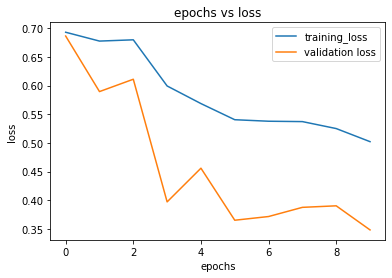

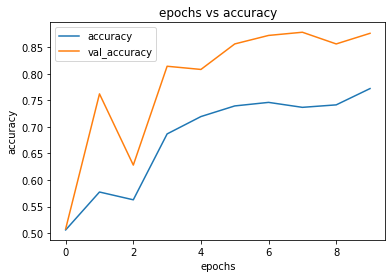

In [ ]:
plot_curves(hisotry_6)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Sequential



train_datagen_augmented_1 = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range= 0.2,
                                            #  shear_range=0.2,
                                             zoom_range= 0.2,
                                            #  width_shift_range= 0.2,
                                            #  height_shift_range= 0.3,
                                             horizontal_flip= True)


train_data_aug_shuf1 = train_datagen_augmented_1.flow_from_directory(train_dir,
                                                         batch_size=32,
                                                         class_mode= 'binary',
                                                         target_size= (224,224),
                                                         shuffle= True)




model_7= Sequential([
         Conv2D(64, 3, activation= 'relu', input_shape=(224,224,3)),
         Conv2D(64, 3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(32, 3, activation= 'relu'),
         Conv2D(32, 3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(32, 3, activation= 'relu'),
         Conv2D(32,3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(10, 3, activation= 'relu'),
         Conv2D(10,3, activation= 'relu'),
         MaxPool2D(),
         Flatten(),
         Dense(1, activation= 'sigmoid')
])

model_7.compile(optimizer= Adam(0.001),
                loss= 'binary_crossentropy',
                metrics= ['accuracy'])

hisotry_7= model_7.fit(train_data_aug_shuf1,
                       epochs=10,
                       steps_per_epoch= len(train_data_aug_shuf1),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 25s 518ms/step - loss: 0.6099 - accuracy: 0.6680 - val_loss: 0.5533 - val_accuracy: 0.7000
Epoch 2/10
47/47 [==============================] - 24s 512ms/step - loss: 0.5348 - accuracy: 0.7520 - val_loss: 0.4468 - val_accuracy: 0.8140
Epoch 3/10
47/47 [==============================] - 25s 527ms/step - loss: 0.4623 - accuracy: 0.7973 - val_loss: 0.4500 - val_accuracy: 0.8080
Epoch 4/10
47/47 [==============================] - 24s 514ms/step - loss: 0.4579 - accuracy: 0.7980 - val_loss: 0.3651 - val_accuracy: 0.8420
Epoch 5/10
47/47 [==============================] - 24s 510ms/step - loss: 0.4294 - accuracy: 0.8140 - val_loss: 0.3379 - val_accuracy: 0.8520
Epoch 6/10
47/47 [==============================] - 24s 511ms/step - loss: 0.4331 - accuracy: 0.8253 - val_loss: 0.3745 - val_accuracy: 0.8380
Epoch 7/10
47/47 [==============================] - 25s 529ms/step - loss: 0.4389 - accuracy: 0.8207

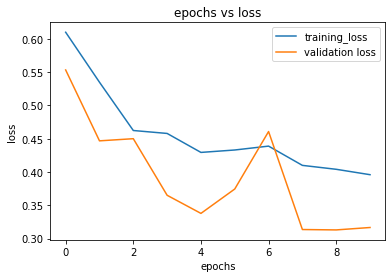

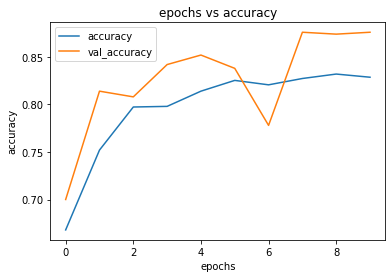

In [ ]:
plot_curves(hisotry_7)

**Checking how the model is predicting with custom image**

--2022-07-13 22:31:40--  https://st.depositphotos.com/1003814/5052/i/950/depositphotos_50523105-stock-photo-pizza-with-tomatoes.jpg
Resolving st.depositphotos.com (st.depositphotos.com)... 104.73.155.46
Connecting to st.depositphotos.com (st.depositphotos.com)|104.73.155.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170114 (166K) [image/jpeg]
Saving to: ‘depositphotos_50523105-stock-photo-pizza-with-tomatoes.jpg’

depositphotos_50523 100%[===================>] 166.13K  --.-KB/s    in 0.01s   

2022-07-13 22:31:40 (14.4 MB/s) - ‘depositphotos_50523105-stock-photo-pizza-with-tomatoes.jpg’ saved [170114/170114]



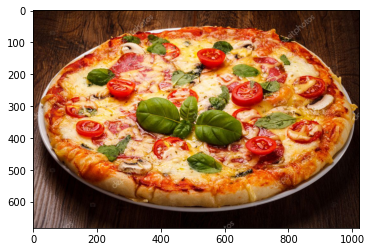

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://st.depositphotos.com/1003814/5052/i/950/depositphotos_50523105-stock-photo-pizza-with-tomatoes.jpg
im= mpimg.imread("depositphotos_50523105-stock-photo-pizza-with-tomatoes.jpg")
plt.imshow(im)

In [ ]:
im.shape

(682, 1023, 3)

In [ ]:
model_7.predict(im)

ValueError: ignored

In [ ]:
expanded_im= tf.expand_dims(im, axis=0)
expanded_im.shape

TensorShape([1, 682, 1023, 3])

In [ ]:
model_7.predict(expanded_im)

ValueError: ignored

In [ ]:
def prep_load_im(filename, image_shape=224):
  ''' reads image from file name and turns it into a tensor and reshape and rescale it into required.'''
  
  ima = tf.io.read_file(filename)
  # to decode the read file into tensor
  ima = tf.image.decode_image(ima)
  # to resize the image
  ima = tf.image.resize(ima,size=[image_shape, image_shape])
  ima = ima/255.
  return ima


In [ ]:
im = prep_load_im('depositphotos_50523105-stock-photo-pizza-with-tomatoes.jpg')
im = tf.expand_dims(im,axis=0)

In [ ]:
pred= model_7.predict(im)

In [ ]:
classes[int(tf.round(pred))]

'pizza'

**Defining a function for predicting image and plot it**

In [ ]:
def pred_plot(model, filename, class_names= classes):
  img= prep_load_im(filename)
  pred_= model.predict(tf.expand_dims(img, axis=0))
  pred_class= class_names[int(tf.round(pred_))]
  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis('off')

--2022-07-13 22:40:13--  https://cdn.statically.io/img/whitneybond.com/f=auto/wp-content/uploads/2021/06/steak-marinade-13.jpg
Resolving cdn.statically.io (cdn.statically.io)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to cdn.statically.io (cdn.statically.io)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 329759 (322K) [image/jpeg]
Saving to: ‘steak-marinade-13.jpg.6’

steak-marinade-13.j 100%[===================>] 322.03K  --.-KB/s    in 0.01s   

2022-07-13 22:40:13 (27.1 MB/s) - ‘steak-marinade-13.jpg.6’ saved [329759/329759]



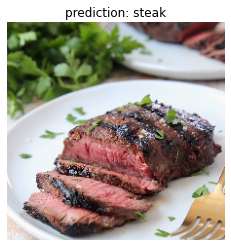

In [ ]:
!wget https://cdn.statically.io/img/whitneybond.com/f=auto/wp-content/uploads/2021/06/steak-marinade-13.jpg
pred_plot(model_7, 'steak-marinade-13.jpg')

--2022-07-13 22:42:28--  http://pm1.narvii.com/6582/d017f2d6a6e9aeb68ddba8b4a6e84ebe0ffbb873_00.jpg
Resolving pm1.narvii.com (pm1.narvii.com)... 13.226.158.72, 13.226.158.116, 13.226.158.10, ...
Connecting to pm1.narvii.com (pm1.narvii.com)|13.226.158.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36371 (36K) [image/jpeg]
Saving to: ‘d017f2d6a6e9aeb68ddba8b4a6e84ebe0ffbb873_00.jpg.1’

d017f2d6a6e9aeb68dd 100%[===================>]  35.52K  --.-KB/s    in 0.01s   

2022-07-13 22:42:28 (3.10 MB/s) - ‘d017f2d6a6e9aeb68ddba8b4a6e84ebe0ffbb873_00.jpg.1’ saved [36371/36371]



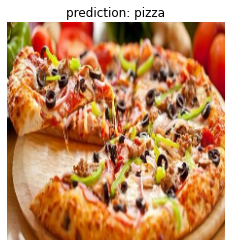

In [ ]:
!wget http://pm1.narvii.com/6582/d017f2d6a6e9aeb68ddba8b4a6e84ebe0ffbb873_00.jpg
pred_plot(model_7,'d017f2d6a6e9aeb68ddba8b4a6e84ebe0ffbb873_00.jpg')